In [26]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import matplotlib.pyplot as plt

import numpy as np
import os


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import zipfile

zip_path = '/content/drive/MyDrive/Birds_25.zip'  # Change path if needed
extract_path = '/content/Birds_25'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset unzipped!")


✅ Dataset unzipped!


In [4]:
base_dir = '/content/Birds_25'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'valid')

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [6]:
val_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 30000 images belonging to 25 classes.
Found 7500 images belonging to 25 classes.


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2

In [10]:
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = True

In [11]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

In [12]:
lr_schedule = ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)


In [ ]:
model.compile(
    optimizer=optimizer,
    loss=CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)

In [13]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
checkpoint_cb = ModelCheckpoint(
    'best_mobilenet_model.h5', monitor='val_accuracy',
    save_best_only=True, mode='max', verbose=1
)

earlystop_cb = EarlyStopping(
    monitor='val_accuracy', patience=5,
    restore_best_weights=True, mode='max', verbose=1
)

In [14]:
base_model.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)

In [15]:
history_phase1 = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[checkpoint_cb, earlystop_cb]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4899 - loss: 2.4810
Epoch 1: val_accuracy improved from -inf to 0.83827, saving model to best_mobilenet_model.h5


938/938 ━━━━━━━━━━━━━━━━━━━━ 2355s 3s/step - accuracy: 0.4900 - loss: 2.4806 - val_accuracy: 0.8383 - val_loss: 1.4368
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7107 - loss: 1.7065
Epoch 2: val_accuracy improved from 0.83827 to 0.84560, saving model to best_mobilenet_model.h5


938/938 ━━━━━━━━━━━━━━━━━━━━ 2347s 3s/step - accuracy: 0.7108 - loss: 1.7065 - val_accuracy: 0.8456 - val_loss: 1.3447
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7350 - loss: 1.6004
Epoch 3: val_accuracy improved from 0.84560 to 0.85333, saving model to best_mobilenet_model.h5


938/938 ━━━━━━━━━━━━━━━━━━━━ 2349s 3s/step - accuracy: 0.7350 - loss: 1.6004 - val_accuracy: 0.8533 - val_loss: 1.2987
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7429 - loss: 1.5504
Epoch 4: val_accuracy improved from 0.85333 to 0.86613, saving model to best_mobilenet_model.h5


938/938 ━━━━━━━━━━━━━━━━━━━━ 2367s 3s/step - accuracy: 0.7429 - loss: 1.5504 - val_accuracy: 0.8661 - val_loss: 1.2517
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7545 - loss: 1.5143
Epoch 5: val_accuracy did not improve from 0.86613
938/938 ━━━━━━━━━━━━━━━━━━━━ 2353s 3s/step - accuracy: 0.7545 - loss: 1.5143 - val_accuracy: 0.8637 - val_loss: 1.2595
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7524 - loss: 1.5172

KeyboardInterrupt: 

In [16]:
model.save('mobilenet_birds_cpu_final.keras')


In [17]:
base_model.trainable = True

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)


In [18]:
history_phase2 = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=2,
    callbacks=[checkpoint_cb, earlystop_cb]
)

Epoch 1/2
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.8156 - loss: 1.3649
Epoch 1: val_accuracy improved from 0.86613 to 0.94973, saving model to best_mobilenet_model.h5


938/938 ━━━━━━━━━━━━━━━━━━━━ 7911s 8s/step - accuracy: 0.8156 - loss: 1.3648 - val_accuracy: 0.9497 - val_loss: 1.0242
Epoch 2/2
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.9217 - loss: 1.0928
Epoch 2: val_accuracy improved from 0.94973 to 0.96133, saving model to best_mobilenet_model.h5


938/938 ━━━━━━━━━━━━━━━━━━━━ 7933s 8s/step - accuracy: 0.9217 - loss: 1.0928 - val_accuracy: 0.9613 - val_loss: 0.9568
Restoring model weights from the end of the best epoch: 2.


In [19]:
from tensorflow.keras.models import load_model
model = load_model('best_mobilenet_model.h5')
model.save('mobilenet_birds_finetuned.keras')


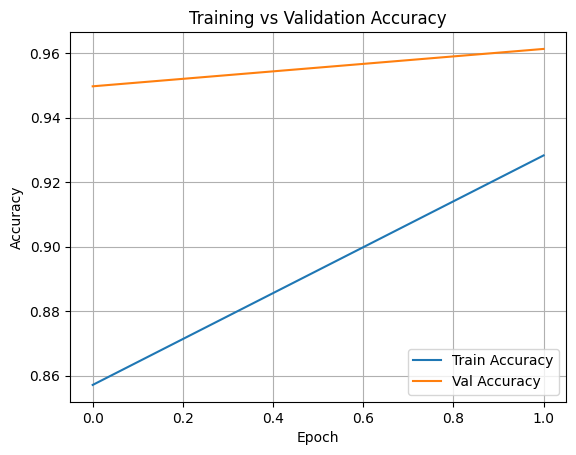

In [22]:
plt.plot(history_phase2.history['accuracy'], label='Train Accuracy')
plt.plot(history_phase2.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.title('Training vs Validation Accuracy')
plt.show()

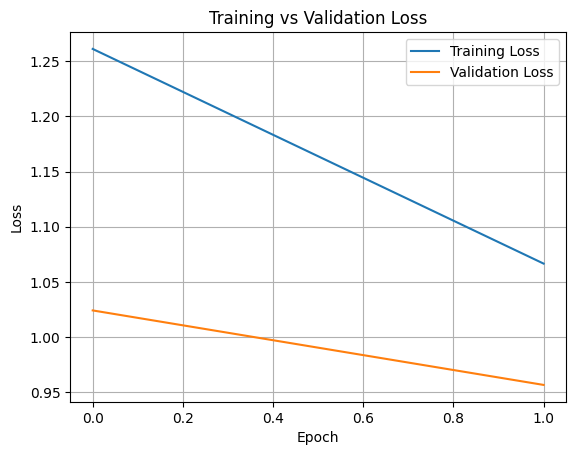

In [23]:
plt.plot(history_phase2.history['loss'], label='Training Loss')
plt.plot(history_phase2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


Found 7500 images belonging to 25 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 422s 2s/step


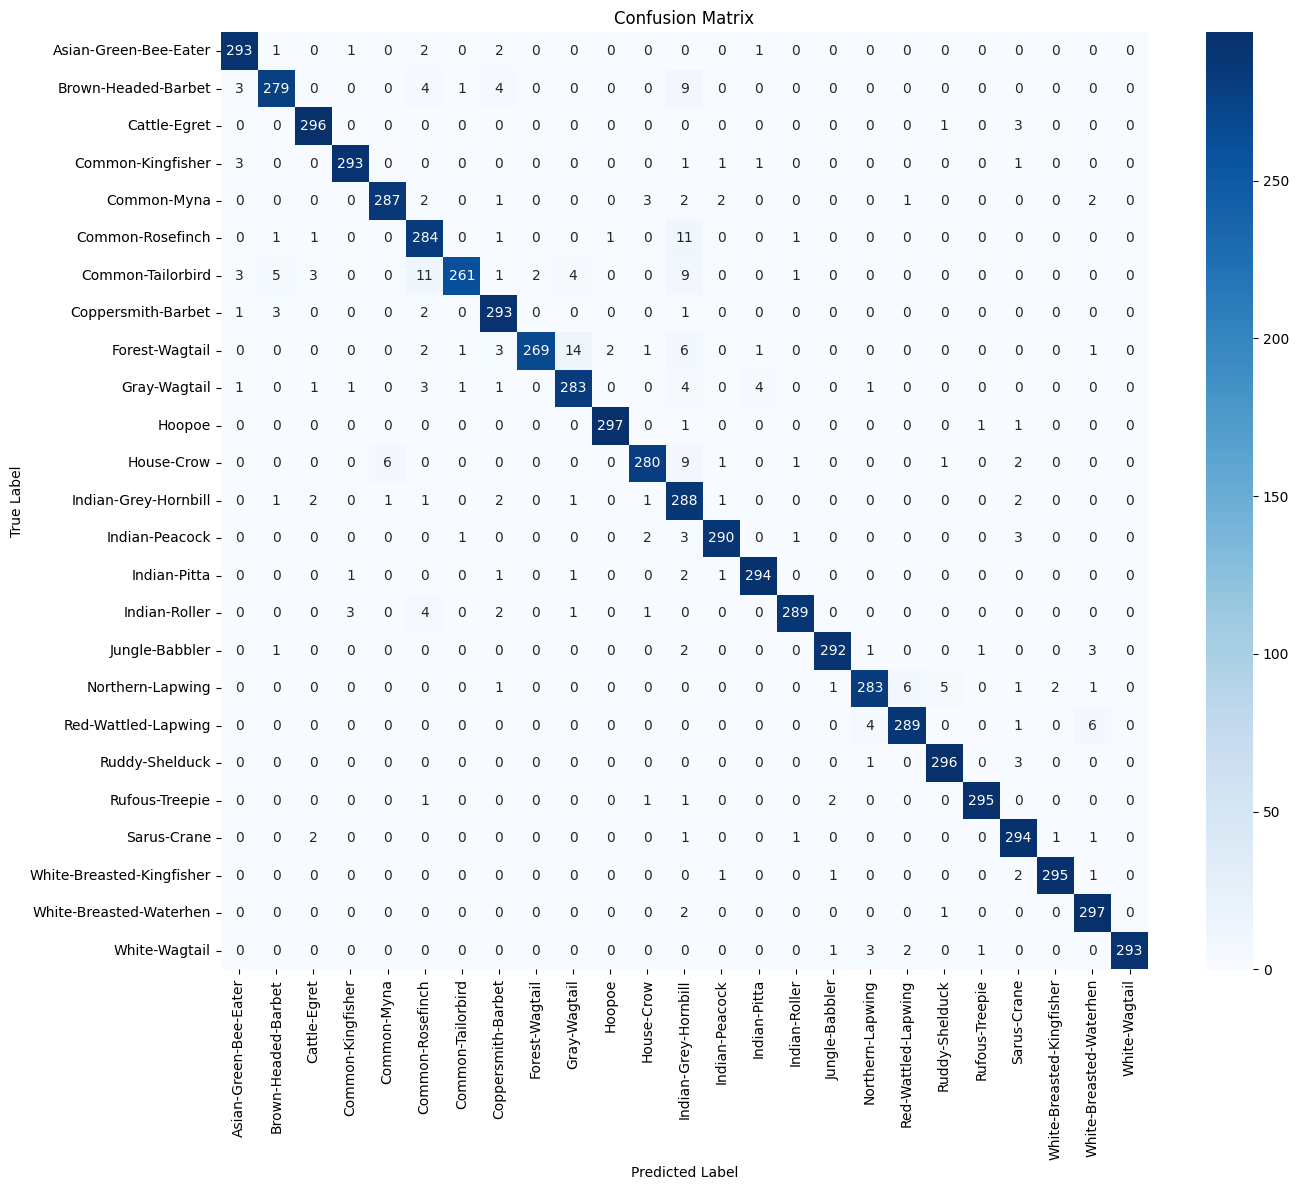

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

true_labels = val_generator.classes

pred_probs = model.predict(val_generator)
pred_labels = np.argmax(pred_probs, axis=1)

class_names = list(val_generator.class_indices.keys())

cm = confusion_matrix(true_labels, pred_labels)

plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [28]:
# Print classification report
print("Classification Report:\n")
print(classification_report(true_labels, pred_labels, target_names=class_names))

Classification Report:

                           precision    recall  f1-score   support

    Asian-Green-Bee-Eater       0.96      0.98      0.97       300
      Brown-Headed-Barbet       0.96      0.93      0.94       300
             Cattle-Egret       0.97      0.99      0.98       300
        Common-Kingfisher       0.98      0.98      0.98       300
              Common-Myna       0.98      0.96      0.97       300
         Common-Rosefinch       0.90      0.95      0.92       300
        Common-Tailorbird       0.98      0.87      0.92       300
       Coppersmith-Barbet       0.94      0.98      0.96       300
           Forest-Wagtail       0.99      0.90      0.94       300
             Gray-Wagtail       0.93      0.94      0.94       300
                   Hoopoe       0.99      0.99      0.99       300
               House-Crow       0.97      0.93      0.95       300
     Indian-Grey-Hornbill       0.82      0.96      0.88       300
           Indian-Peacock       0.98 

In [27]:
import tensorflow as tf

# Load the model from a .keras file
model = tf.keras.models.load_model("mobilenet_birds_finetuned.keras")


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 172 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [30]:
val_generator.reset()
y_true = val_generator.classes
class_names = list(val_generator.class_indices.keys())

y_probs = model.predict(val_generator)
y_pred = np.argmax(y_probs, axis=1)


235/235 ━━━━━━━━━━━━━━━━━━━━ 451s 2s/step


In [31]:
overall_acc = np.mean(y_pred == y_true)
print(f"✅ Overall Accuracy: {overall_acc * 100:.2f}%")

✅ Overall Accuracy: 96.13%


In [32]:
print(train_generator.class_indices)

{'Asian-Green-Bee-Eater': 0, 'Brown-Headed-Barbet': 1, 'Cattle-Egret': 2, 'Common-Kingfisher': 3, 'Common-Myna': 4, 'Common-Rosefinch': 5, 'Common-Tailorbird': 6, 'Coppersmith-Barbet': 7, 'Forest-Wagtail': 8, 'Gray-Wagtail': 9, 'Hoopoe': 10, 'House-Crow': 11, 'Indian-Grey-Hornbill': 12, 'Indian-Peacock': 13, 'Indian-Pitta': 14, 'Indian-Roller': 15, 'Jungle-Babbler': 16, 'Northern-Lapwing': 17, 'Red-Wattled-Lapwing': 18, 'Ruddy-Shelduck': 19, 'Rufous-Treepie': 20, 'Sarus-Crane': 21, 'White-Breasted-Kingfisher': 22, 'White-Breasted-Waterhen': 23, 'White-Wagtail': 24}
